In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
import itertools
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [3]:
train_data= pd.read_csv('/content/train.csv')
test_data= pd.read_csv('/content/test.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
print('Number of columns in train data :',train_data.shape[1])
print('Number of rows train data :',train_data.shape[0])

print('Number of columns in test data :',test_data.shape[1])
print('Number of rows in test data :',test_data.shape[0])

Number of columns in train data : 12
Number of rows train data : 891
Number of columns in test data : 11
Number of rows in test data : 418


In [8]:
train_data.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [9]:
test_data.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [14]:
precent_null_train = train_data.isnull().sum().sum()/np.product(train_data.shape)*100
precent_null_test = test_data.isnull().sum().sum()/np.product(test_data.shape)*100

print('Percetnage of null values in train data: ',precent_null_train)
print('Percetnage of null values in test data: ',precent_null_test)
print(" ")
precent_null_train_cabin= train_data['Cabin'].isnull().sum()/train_data.shape[0]*100
precent_null_test_cabin= test_data['Cabin'].isnull().sum()/test_data.shape[0]*100
print('Percetnage of null values in column Cabin in train data: ',precent_null_train_cabin)
print('Percetnage of null values in column Cabin in test data: ',precent_null_test_cabin)

Percetnage of null values in train data:  8.099513655069211
Percetnage of null values in test data:  9.00391474554154
 
Percetnage of null values in column Cabin in train data:  77.10437710437711
Percetnage of null values in column Cabin in test data:  78.22966507177034


#Filling and Removing missing value in Fare column with previous value 

In [15]:
train_data.drop('Cabin',axis=1,inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

In [16]:
train_data.drop('Ticket',axis=1,inplace=True)
test_data.drop('Ticket',axis=1,inplace=True)

In [18]:
age_mean= train_data['Age'].mean()
train_data.Age.fillna(round(age_mean),inplace=True)

In [19]:
age_mean_test= test_data['Age'].mean()
test_full.Age.fillna(round(age_mean_test),inplace=True)

In [20]:
train_data.Embarked.fillna(method='bfill',inplace=True)
test_data.Fare.fillna(method='bfill',inplace=True)

In [21]:
train_data.duplicated().sum(),test_full.duplicated().sum()

(0, 0)

In [22]:
train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


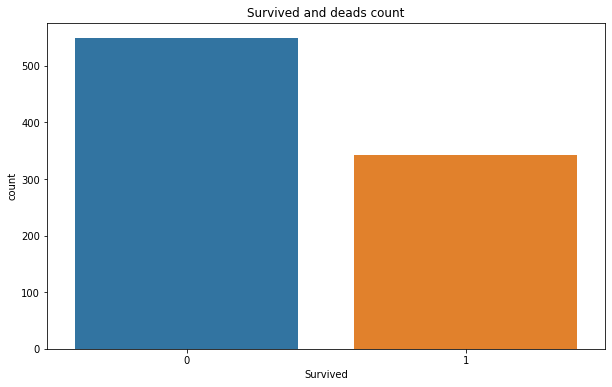

Percentage of dead:  62 %
Percentage of survived: 38 %


In [25]:
plt.figure(figsize=(10,6))
sns.countplot(train_data.Survived).set_title('Survived and deads count')
plt.show();

dead= round(train_data.query('Survived == 0')['Survived'].count()/train_data.shape[0]*100)
survived= 100-dead
print('Percentage of dead: ',dead,'%')
print('Percentage of survived:',survived,'%')

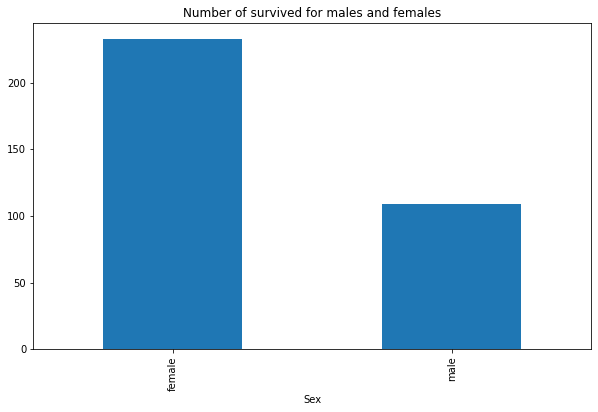

In [26]:
train_full.groupby('Sex').sum()['Survived'].plot(kind='bar',figsize=(10,6))
plt.title('Number of survived for males and females')
plt.show();

In [28]:
train_data[['Survived','Pclass','Sex','SibSp','Parch','Embarked']].nunique()

Survived    2
Pclass      3
Sex         2
SibSp       7
Parch       7
Embarked    3
dtype: int64

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [42]:
def oh_encoding(X):
    categorical_cols = X.select_dtypes(include='object')

    numerical_cols = X.select_dtypes(exclude='object')


    OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    OH_X_full = pd.DataFrame(OH_encoder.fit_transform(categorical_cols))

    OH_X_full.index = categorical_cols.index

    OH_X = pd.concat([numerical_cols, OH_X_full], axis=1)
    return OH_X

In [31]:
y = train_data['Survived']

X = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

X_full = train_data[X].copy()

X_test = train_data[X].copy()



X_train, X_valid, y_train, y_valid = train_test_split(oh_encoding(X_full), y,train_size=0.8, test_size=0.2, random_state=0)

In [45]:
X_valid

,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4
495,3,30.0,0,0,14.4583,0.0,1.0,1.0,0.0,0.0
648,3,30.0,0,0,7.5500,0.0,1.0,0.0,0.0,1.0
278,3,7.0,4,1,29.1250,0.0,1.0,0.0,1.0,0.0
31,1,30.0,1,0,146.5208,1.0,0.0,1.0,0.0,0.0
255,3,29.0,0,2,15.2458,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
780,3,13.0,0,0,7.2292,1.0,0.0,1.0,0.0,0.0
837,3,30.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
215,1,31.0,1,0,113.2750,1.0,0.0,1.0,0.0,0.0
833,3,23.0,0,0,7.8542,0.0,1.0,0.0,0.0,1.0


In [57]:
df_1 = pd.read_csv('test.csv')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [62]:
df_1.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# X = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_1['Sex'] = le.fit_transform(df_1['Sex'])
# df_1['Embarked'] = le.fit_transform(df_1['Embarked'])
# df_1['PassengerId'] = le.fit_transform(df_1['PassengerId'])
# df_1['Pclass'] = le.fit_transform(df_1['Pclass'])
# df_1['Name'] = le.fit_transform(df_1['Name'])
# df_1['Age'] = le.fit_transform(df_1['Age'])
# df_1['SibSp'] = le.fit_transform(df_1['SibSp'])
# df_1['Parch'] = le.fit_transform(df_1['Parch'])
# df_1['Fare'] = le.fit_transform(df_1['Fare'])
# # df_1['Cabin'] = le.fit_transform(df_1['Cabin'])

# # df_1.drop('Cabin',axis=1,inplace=True)
# # df_1.drop('Ticket',axis=1,inplace=True)

test_data.fillna(method = 'ffill' , inplace = True)
# X_full = df_1[X].copy()
test_data['Sex'] = le.fit_transform(test_data['Sex'])
test_data['Name'] = le.fit_transform(test_data['Name'])
test_data['Embarked'] = le.fit_transform(test_data['Embarked'])

prediction_lr = LR_model.predict(test_data)

In [74]:
X_train

,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4
140,3,30.0,0,2,15.2458,1.0,0.0,1.0,0.0,0.0
439,2,31.0,0,0,10.5000,0.0,1.0,0.0,0.0,1.0
817,2,31.0,1,1,37.0042,0.0,1.0,1.0,0.0,0.0
378,3,20.0,0,0,4.0125,0.0,1.0,1.0,0.0,0.0
491,3,21.0,0,0,7.2500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
835,1,39.0,1,1,83.1583,1.0,0.0,1.0,0.0,0.0
192,3,19.0,1,0,7.8542,1.0,0.0,0.0,0.0,1.0
629,3,30.0,0,0,7.7333,0.0,1.0,0.0,1.0,0.0
559,3,36.0,1,0,17.4000,1.0,0.0,0.0,0.0,1.0


In [71]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [52]:
X_full.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [58]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [44]:
LR_model = LogisticRegression(C=0.01, solver='liblinear')
LR_model.fit(X_train,y_train) 
prediction_lr = LR_model.predict(X_valid)
print('accuracy score for Logistic Regression',accuracy_score(y_valid,prediction_lr))

accuracy score for Logistic Regression 0.7821229050279329


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [36]:
prediction_lr

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [38]:
df = pd.DataFrame(prediction_lr,columns=['Survived'])
df['PassengerId'] = test_data['PassengerId']
df

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,1,895
4,0,896
...,...,...
174,1,1066
175,0,1067
176,1,1068
177,0,1069


In [41]:
df.to_csv('result.csv')
